In [22]:
!pip install networkx powerlaw

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
import statistics
import math
import numpy as np
import powerlaw
import seaborn as sns
from collections import Counter
from scipy.stats import norm
from termcolor import colored, cprint

In [24]:
MORENO_RESIDENCE_HALL_FILE = 'networks/moreno_residence_hall.txt'

# Residence-Hall-Network

(Directed)

This directed network contains friendship ratings between 217 residents living at a residence hall located on the Australian National University campus. A node represents a person and 
an edge represents a friendship tie.  The friendships are weighted as follows from strongest to weakest tie:  5 (best friend), 4 (close friend), 3 (friend), 2, 1.

In [25]:
G = nx.read_weighted_edgelist(MORENO_RESIDENCE_HALL_FILE, create_using= nx.DiGraph, nodetype=int)
cprint(nx.info(G),'green')

DiGraph with 217 nodes and 2672 edges


In [26]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
nodes = G.nodes()
edges = G.edges()

# Degree

In [27]:
degrees_sequences = {'Degree sequence':[G.degree(n) for n in G.nodes],
'Strength degree sequence':[G.degree(n, weight='weight') for n in G.nodes],
'In degree sequence':[G.in_degree(n) for n in G.nodes],
'Out degree sequence':[G.out_degree(n) for n in G.nodes],
'In-Strength sequence':[G.in_degree(n, weight='weight') for n in G.nodes],
'Out-Strength degree sequence':[G.out_degree(n, weight='weight') for n in G.nodes]}

In [28]:
def print_degree_statistics(mu_degree, median_degree, variance_degree,sigma_degree):
    cprint('Mean degree:', 'blue', end=' ') 
    cprint(mu_degree, 'green')
    cprint('Median degree:','blue', end=' ') 
    cprint(median_degree, 'green')
    cprint('Max degree:', 'blue', end=' ')
    cprint(max(degrees_sequences['Degree sequence']), 'green')
    cprint('Variance:', 'blue', end=' ')
    cprint(variance_degree, 'green')
    cprint('Standard deviation:', 'blue', end=' ')
    cprint(sigma_degree, 'green')
    print()

    highest_degree_node = max(G.nodes, key=G.degree)
    cprint("Highest degree node label:",'blue', end=' ')
    cprint(highest_degree_node,'green')
    cprint("Maximum degree", 'blue', end=' ')
    cprint(max(degrees_sequences['Degree sequence']),'green')


## Network statistics without weight

In [29]:
mu_degree = statistics.mean(degrees_sequences['Degree sequence'])
median_degree = statistics.median(degrees_sequences['Degree sequence'])
variance_degree = statistics.variance(degrees_sequences['Degree sequence'])
sigma_degree = statistics.stdev(degrees_sequences['Degree sequence'])

print_degree_statistics(mu_degree, median_degree, variance_degree,sigma_degree)

Mean degree: 24.62672811059908
Median degree: 23
Max degree: 80
Variance: 124.50354155999318
Standard deviation: 11.15811550218016

Highest degree node label: 70
Maximum degree 80


## Network statistics with weight

In [30]:
mu_degree = statistics.mean(degrees_sequences['Strength degree sequence'])
median_degree = statistics.median(degrees_sequences['Strength degree sequence'])
variance_degree = statistics.variance(degrees_sequences['Strength degree sequence'])
sigma_degree = statistics.stdev(degrees_sequences['Strength degree sequence'])

print_degree_statistics(mu_degree, median_degree, variance_degree,sigma_degree)

Mean degree: 83.2073732718894
Median degree: 79.0
Max degree: 80
Variance: 1372.5540194572452
Standard deviation: 37.04799615980931

Highest degree node label: 70
Maximum degree 80


## Degree distribution

### Frequency

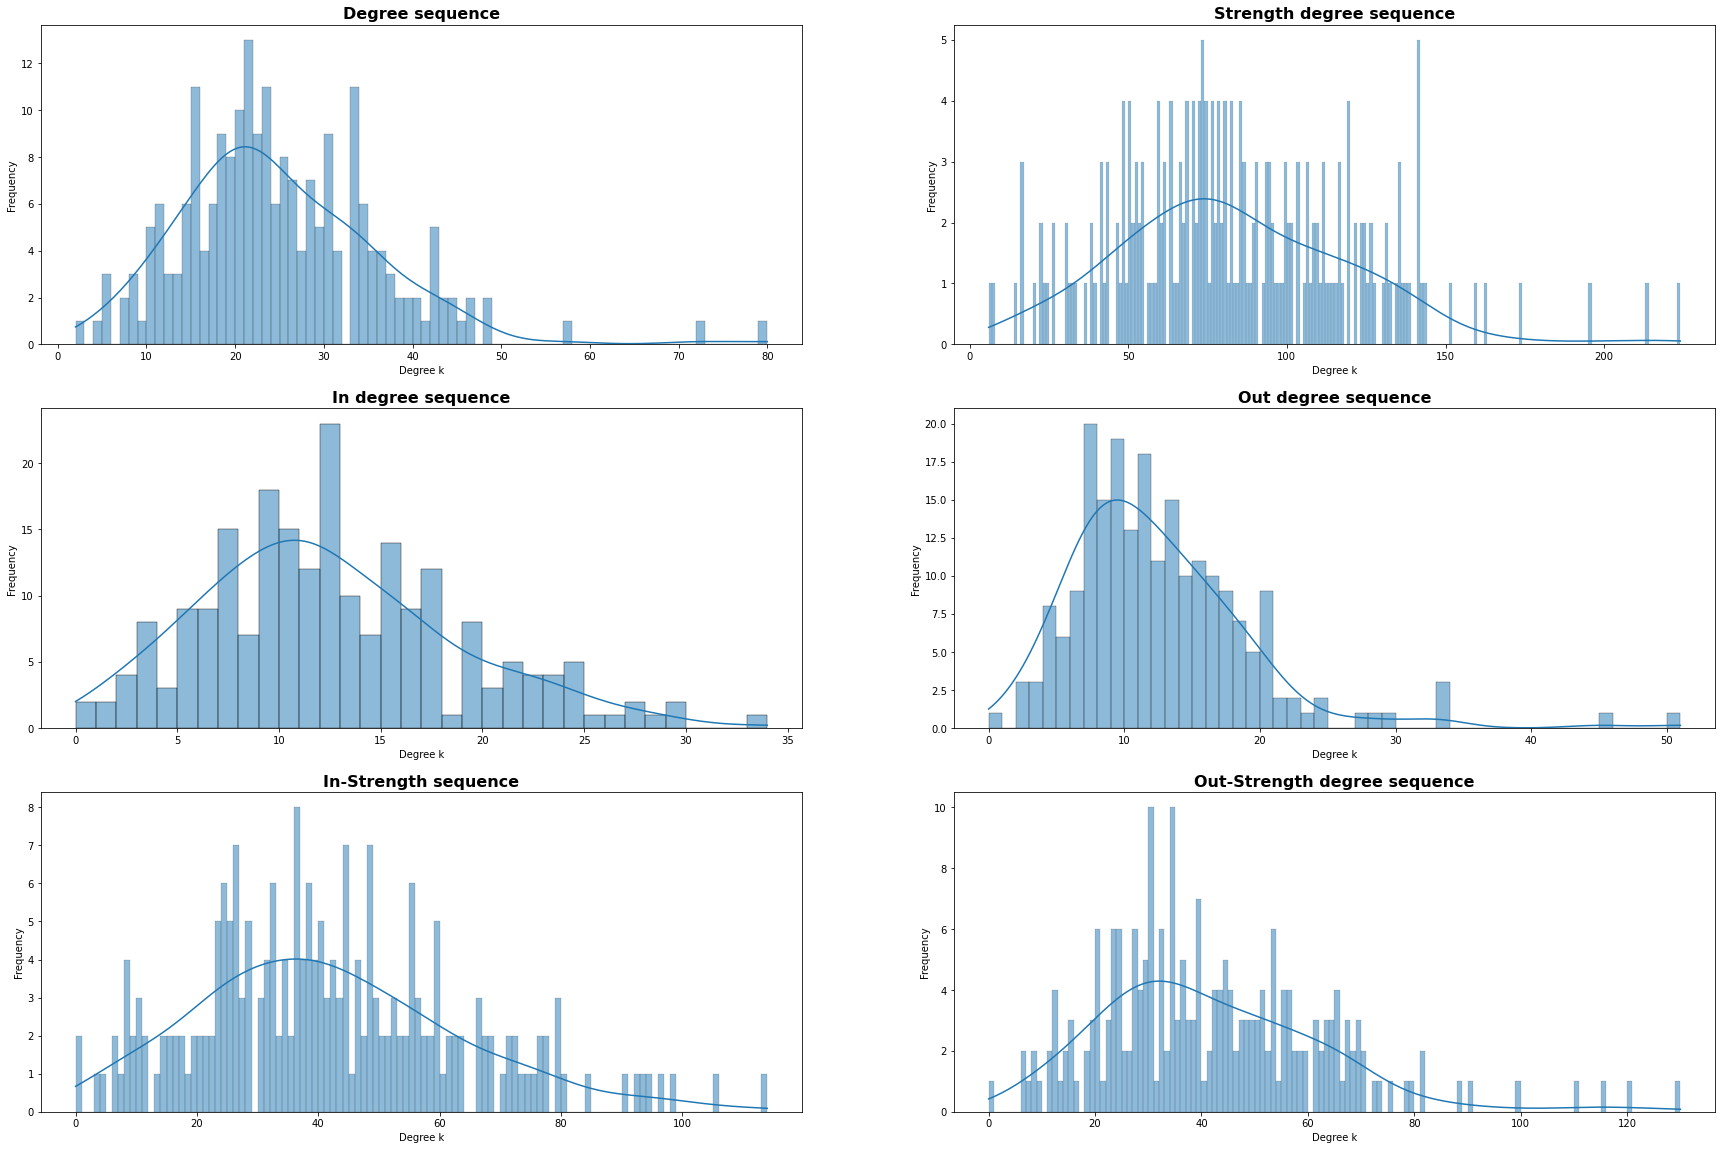

In [31]:
degree_map = {}
for k in degrees_sequences.keys():
    degree_counts = Counter(degrees_sequences[k])
    plot_x = list(np.arange(min(degree_counts.keys()), max(degree_counts.keys())+1))
    plot_y = [degree_counts.get(x, 0) for x in plot_x]
    degree_map[k] = { 'x': plot_x, 'y': plot_y}

titles = list(degrees_sequences.keys())

fig_degree, axes = plt.subplots(nrows=3, ncols=2)
for i, ax in enumerate(axes.flatten()):
    #ax.bar(degree_map[titles[i]][0],degree_map[titles[i]][1])
    sns.histplot(ax=ax, data=degrees_sequences[titles[i]], kde=True, stat='frequency', bins=degree_map[titles[i]]['x'])
    ax.set_title(titles[i],fontdict= { 'fontsize': 16, 'fontweight':'bold'})
    ax.set_xlabel("Degree k")
    ax.set_ylabel("Frequency")

fig_degree.figure.set_size_inches((30,20))

### Probability

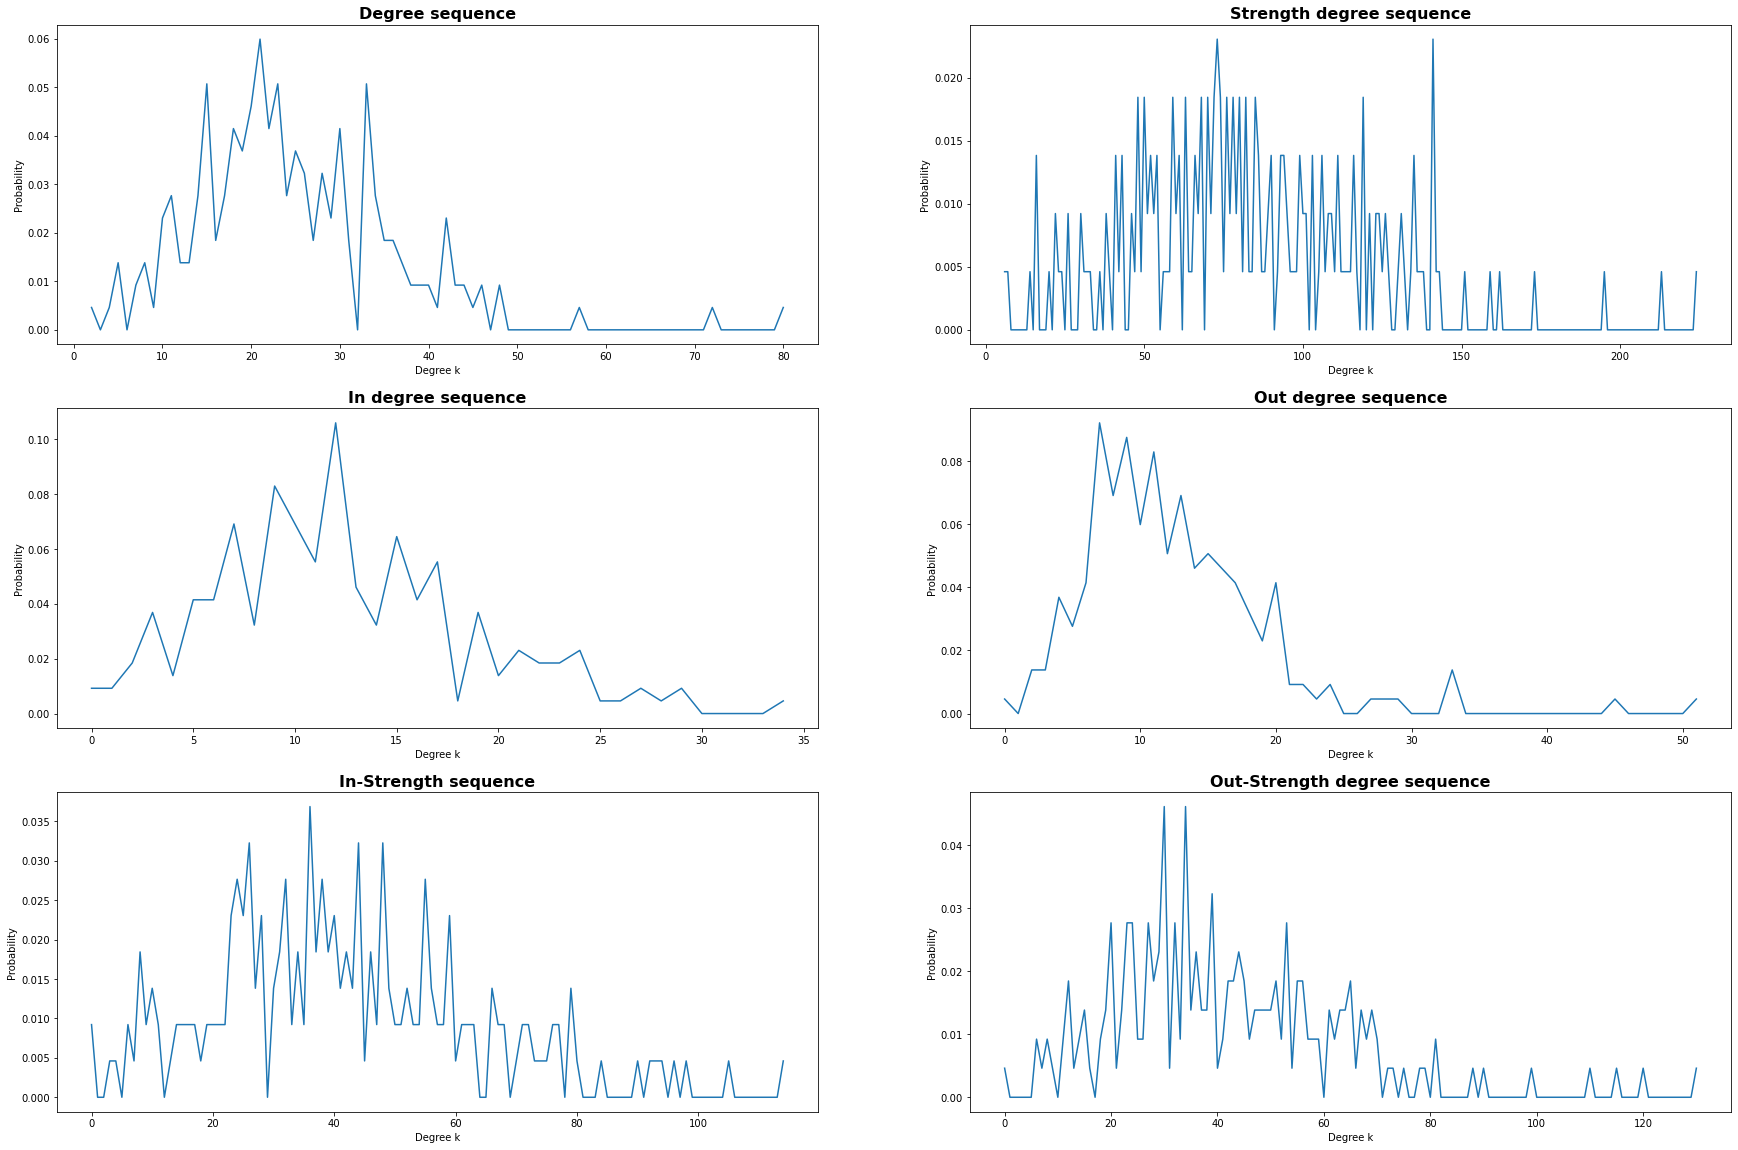

In [32]:
def get_degree_probability(degree_counts, min_degree, max_degree):
  degree_prob = {}

  for degree in np.arange(min_degree, max_degree + 1):
    if degree in degree_counts:
      num_nodes_degree = degree_counts[degree]
      prob = num_nodes_degree/num_nodes
      degree_prob[degree] = prob
    else:
      degree_prob[degree] = 0
  
  return degree_prob



fig_prob, axes = plt.subplots(nrows=3, ncols=2)
for i, ax in enumerate(axes.flatten()):
    #ax.bar(degree_map[titles[i]][0],degree_map[titles[i]][1])
    degree_counts = Counter(degrees_sequences[titles[i]])
    degree_probability = get_degree_probability(degree_counts,min(degree_counts.keys()), max(degree_counts.keys()))
    sns.lineplot(ax=ax, data=degree_probability)
    ax.set_title(titles[i],fontdict= { 'fontsize': 16, 'fontweight':'bold'})
    ax.set_xlabel("Degree k")
    ax.set_ylabel("Probability")

fig_prob.figure.set_size_inches((30,20))  


# Power Law and Scale Free Regime

In [33]:
# value of cdf between one, two
# and three S.D. around the mean
one_sd = norm.cdf(sigma_degree, mu_degree, sigma_degree) - norm.cdf(-sigma_degree, mu_degree, sigma_degree)
two_sd = norm.cdf(2 * sigma_degree, mu_degree, sigma_degree) - norm.cdf(-2 * sigma_degree, mu_degree, sigma_degree)
three_sd = norm.cdf(3 * sigma_degree, mu_degree, sigma_degree) - norm.cdf(-3 * sigma_degree, mu_degree, sigma_degree)
 
# printing the value of fractions
# within each band
cprint("Fraction of values within one SD:", 'blue', end=' ')
cprint(round(one_sd,2),'green')
cprint("Fraction of values within two SD:", 'blue', end=' ')
cprint(round(two_sd,2), 'green')
cprint("Fraction of values within three SD:", 'blue', end=' ') 
cprint(round(three_sd,2), "green")

if(one_sd==0.68 and two_sd==0.95 and three_sd==0.99):
    cprint('Bell shape distribution.', "green")
else:
    cprint('Doesn\'t fit Bell shape distribution.', "yellow")

Fraction of values within one SD: 0.11
Fraction of values within two SD: 0.4
Fraction of values within three SD: 0.77
Doesn't fit Bell shape distribution.


5.203583993562566
28.0
-0.6014196297735365 0.5475605275065354


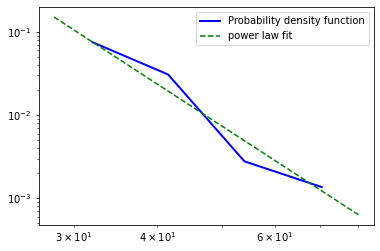

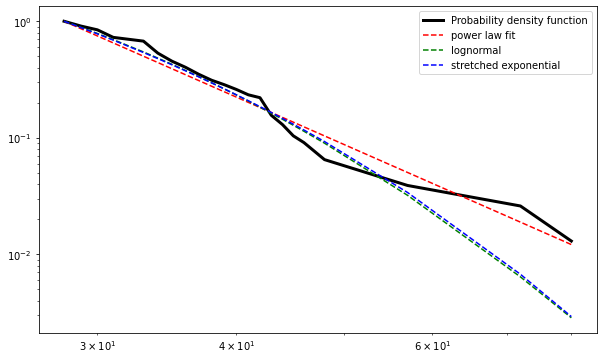

In [34]:
fit = powerlaw.Fit(degrees_sequences['Degree sequence'], xmin=28) 

print(fit.power_law.alpha)
print(fit.power_law.xmin)


fig2 = fit.plot_pdf(color='b', linewidth=2)
fig3 = fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2)
fig3.legend(["Probability density function","power law fit"])

R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print (R, p)

plt.figure(figsize=(10, 6))
fit.distribution_compare('power_law', 'lognormal')
fig4 = fit.plot_ccdf(linewidth=3, color='black')
fit.power_law.plot_ccdf(ax=fig4, color='r', linestyle='--') #powerlaw
fit.lognormal.plot_ccdf(ax=fig4, color='g', linestyle='--') #lognormal
fit.stretched_exponential.plot_ccdf(ax=fig4, color='b', linestyle='--') #stretched_exponential
fig4.legend(["Probability density function","power law fit", "lognormal", "stretched exponential"])

# Distance

## Average shortest path length

In [35]:
avg_short_path = nx.average_shortest_path_length(G)
cprint("Average shortest path length: ", 'blue', end=' ')
cprint(round(avg_short_path,2), 'green')

if(math.isclose(math.log(G.number_of_nodes(),10),avg_short_path,abs_tol=0.5)):
    cprint("Small-wordl", 'yellow')
else:
    cprint("NOT Small-wordl ", 'yellow')


Average shortest path length:  2.73
Small-word


## Shortest path length distribution

In [36]:
shortest_path_lengths = dict(nx.shortest_path_length(G))
#counting how many paths have certain length
shortest_length_counts = Counter()
for i in range(num_nodes):
    if(i!=0):
        shortest_length_counts.update(Counter(shortest_path_lengths[i].values()))

Text(0, 0.5, 'Number of paths')

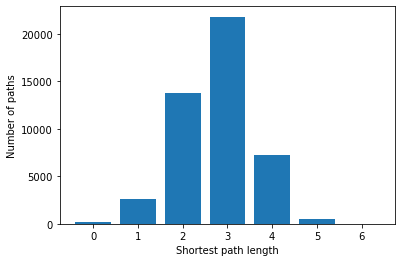

In [37]:
#shortest path length minimo e massimo
min_length, max_length = min(shortest_length_counts.keys()), max(shortest_length_counts.keys())

#asse x: shortest path length
shortest_length_plot_x = list(range(min_length, max_length + 1))

#asse y: num of paths
shortest_length_plot_y = [shortest_length_counts.get(x, 0) for x in shortest_length_plot_x]

plt.bar(shortest_length_plot_x, shortest_length_plot_y)

plt.xlabel("Shortest path length")
plt.ylabel("Number of paths")

Function that returns the probability that a path has a certain length:

In [38]:
def get_shortest_path_length_probability(shortest_length_counts, min_length, max_length):
  length_prob = {}
  num_path = sum(shortest_length_counts.values())

  for length in range(min_length, max_length + 1):
    if length in shortest_length_counts:
      num_path_length = shortest_length_counts[length]
      prob = num_path_length/num_path
      length_prob[length] = prob
    else:
      length_prob[length] = 0
  
  return length_prob

Text(0, 0.5, 'Shortest path length probability')

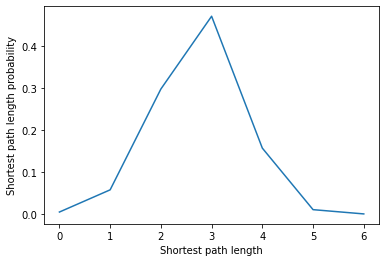

In [39]:
length_probability = get_shortest_path_length_probability(shortest_length_counts, min_length, max_length)

shortest_length_plot_y_prob = [length_probability[x] for x in shortest_length_plot_x]

plt.plot(shortest_length_plot_x, shortest_length_plot_y_prob)
plt.xlabel("Shortest path length")
plt.ylabel("Shortest path length probability")

# Diameter

Diameter of the largest strongly connected component:

In [40]:
strongly_components = list(nx.strongly_connected_components(G))
largest_strongly = max(strongly_components, key=len)
diameter = nx.diameter(G.subgraph(largest_strongly))

In [41]:
cprint("Diameter:", 'blue', end=' ')
cprint(diameter, 'green')

Diameter: 6
